# Regression between sea level height and the timmerman wind data regions for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [18]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'historical'
model = 'Timmerman'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Plot Timmerman regions

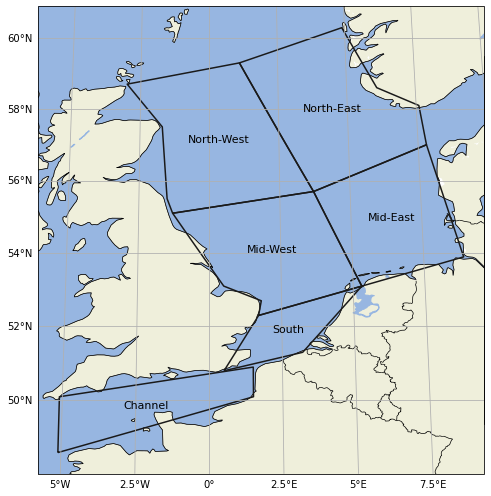

In [19]:
figs.timmerman_regions_plot()

#### Import and plot cmip6 sea level data (zos) historical

In [20]:
# Open data file
zos = imprt.import_cmip6_slh_data()

#### Import and plot nearby wind data

In [21]:
wind_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

### Plot data

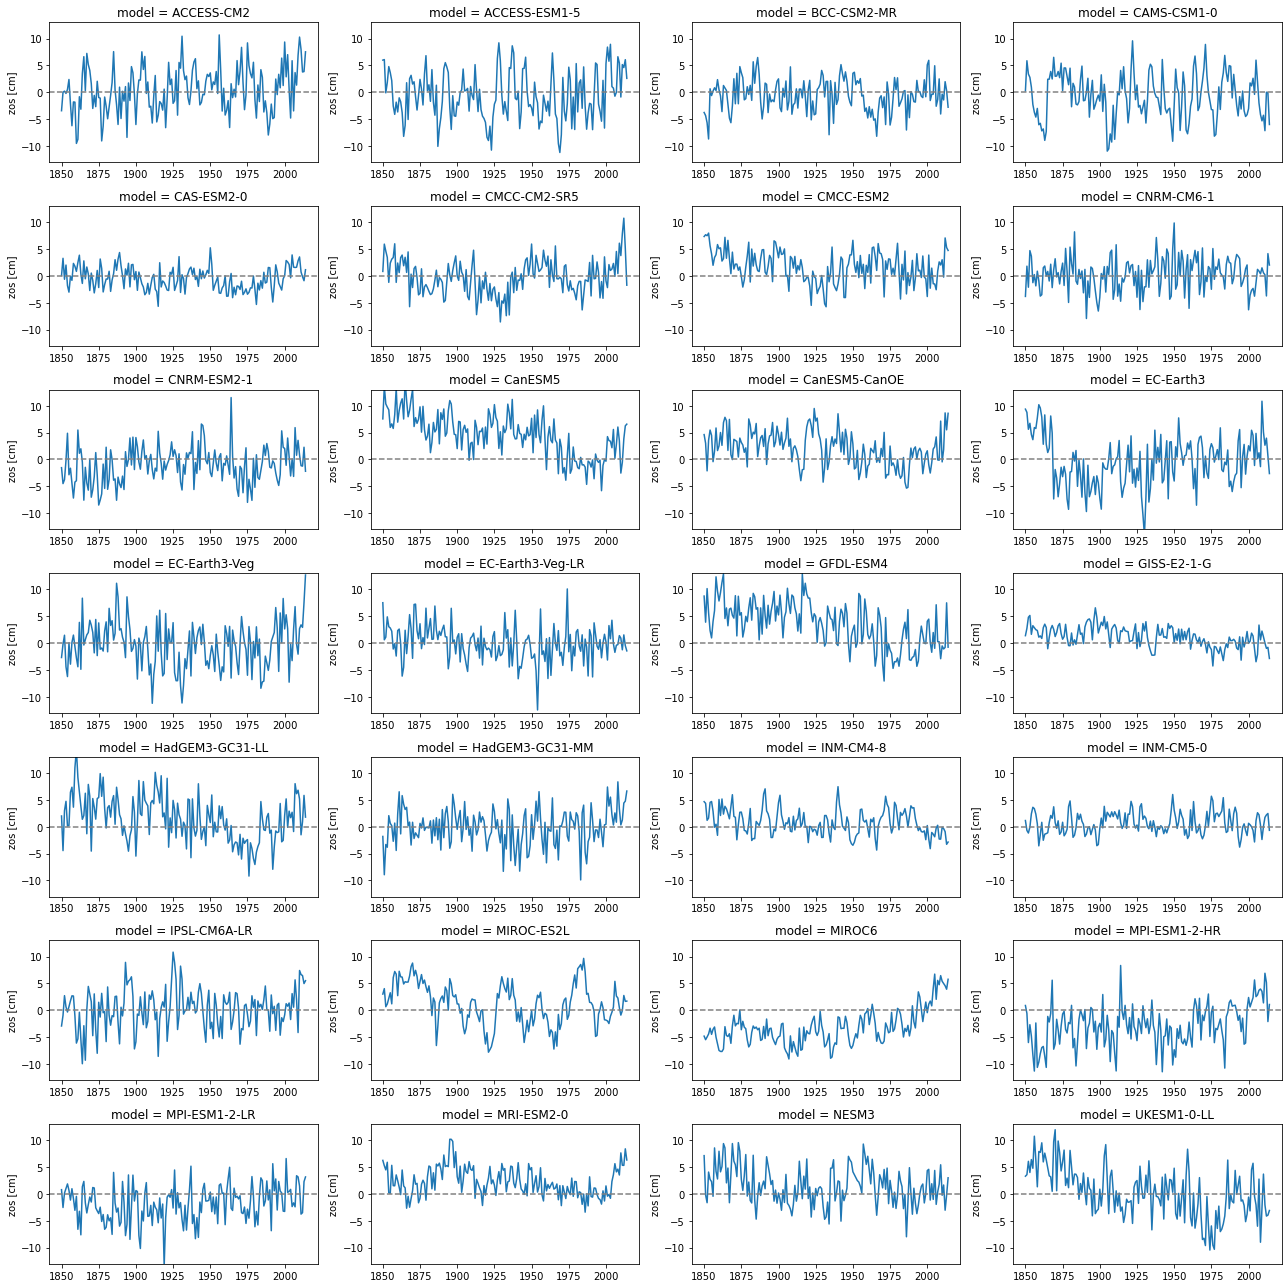

In [22]:
figs.plot_zos_data_per_model(zos, data_type)

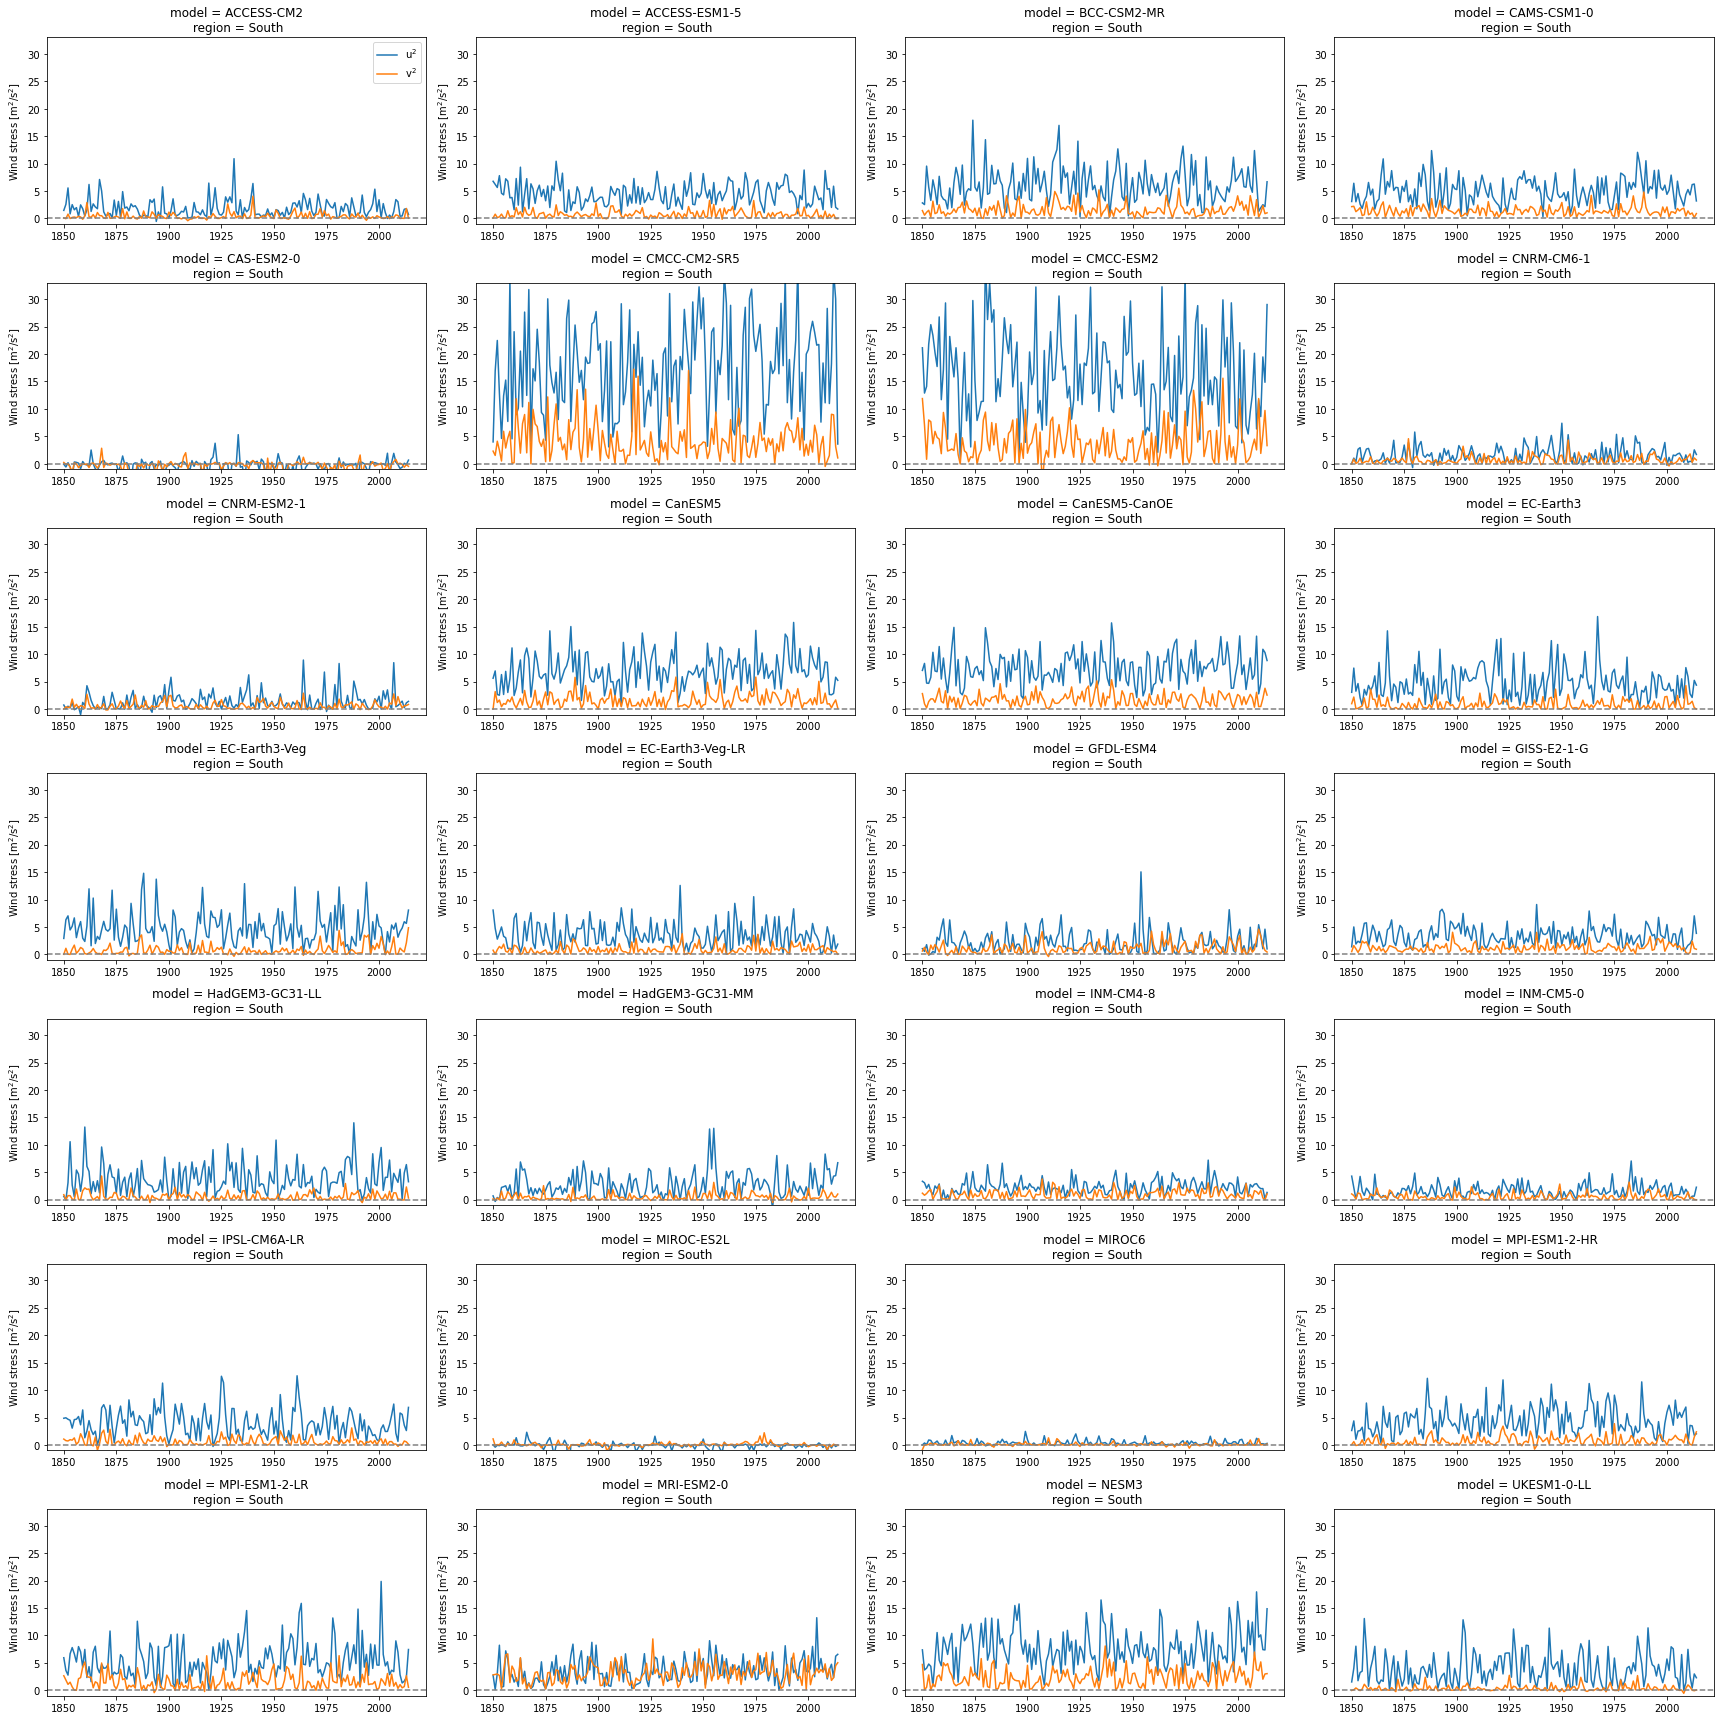

In [23]:
figs.plot_cmip6_wind_data_per_model(wind_data, model, data_type)

### Perform regression

In [24]:
results, timeseries, significance = regres.regression_cmip6(wind_data, zos, wind_model = model, data_type = data_type)

In [25]:
results.sel(station='Average').to_dataframe().drop('station', axis=1)

r2   r2_wind     r2_u2     r2_v2      rmse  constant  \
model                                                                          
ACCESS-CM2        0.479928  0.409330  0.355992  0.022993  2.889534  0.717534   
ACCESS-ESM1-5     0.472799  0.467385  0.455646  0.025187  3.170227 -1.066054   
BCC-CSM2-MR       0.304657  0.308111  0.149822  0.117651  2.584740 -0.665024   
CAMS-CSM1-0       0.177175  0.180260  0.167554  0.000000  3.859393 -0.656951   
CAS-ESM2-0        0.393687  0.251474  0.246132  0.000000  1.612863 -0.931357   
CMCC-CM2-SR5      0.410981  0.381338  0.273107  0.060477  2.336068 -0.494051   
CMCC-ESM2         0.373091  0.329342  0.137140  0.173121  2.345196  1.716946   
CNRM-CM6-1        0.709494  0.712941  0.410805  0.344902  1.738177  0.280323   
CNRM-ESM2-1       0.692456  0.697027  0.528554  0.402662  1.931175 -1.122168   
CanESM5           0.695856  0.297662  0.221680  0.138204  1.969298  4.734218   
CanESM5-CanOE     0.609347  0.461673  0.309622  0.181557  1.921731  2.015437   
EC-Earth3         0.388039  0.366419  0.244114  0.203581  3.692615 -0.974874   
EC-Earth3-Veg     0.605205  0.592796  0.531060  0.228996  2.544604 -0.651826   
EC-Earth3-Veg-LR  0.706807  0.601159  0.500128  0.176042  1.833823 -0.519621   
GFDL-ESM4         0.711632  0.466295  0.357130  0.095359  2.124139  3.522228   
GISS-E2-1-G       0.478930  0.342095  0.160075  0.170574  1.320825  1.261963   
HadGEM3-GC31-LL   0.674591  0.462250  0.322624  0.246599  2.464051  1.001121   
HadGEM3-GC31-MM   0.714734  0.649840  0.602760  0.117684  1.694919 -0.496552   
INM-CM4-8         0.105682  0.051435  0.017353  0.000000  2.250928  0.913434   
INM-CM5-0         0.127744  0.097281  0.097281  0.000000  1.840431  0.781748   
IPSL-CM6A-LR      0.717189  0.714198  0.466446  0.348291  2.018878 -0.114376   
MIROC-ES2L        0.404350  0.195152  0.155199  0.110795  2.987966  0.376196   
MIROC6            0.203891  0.168485  0.168485  0.000000  1.963630 -4.143368   
MPI-ESM1-2-HR     0.571389  0.574785  0.564981  0.000000  2.299232 -3.660971   
MPI-ESM1-2-LR     0.704731  0.709901  0.689587  0.058616  1.762500 -2.154897   
MRI-ESM2-0        0.485655  0.381821  0.297097  0.146183  1.807965  2.276239   
NESM3             0.556056  0.530011  0.345568  0.298684  2.346169  1.905818   
UKESM1-0-LL       0.768679  0.412610  0.326727  0.135493  2.258892 -0.396329   

                  channel_u2  channel_v2  south_u2  south_v2  midwest_u2  \
model                                                                      
ACCESS-CM2          0.000000    0.000000  0.000000 -0.000000    0.000000   
ACCESS-ESM1-5      -0.958459   -0.115841 -0.000000 -0.000000   -0.000000   
BCC-CSM2-MR        -0.000000   -0.000000  0.000000 -0.000000    0.000000   
CAMS-CSM1-0        -0.000000    0.223188  0.000000  0.000000    0.000000   
CAS-ESM2-0         -0.000000   -0.000000 -0.000000  0.000000   -0.000000   
CMCC-CM2-SR5        0.000000    0.121158  0.000000  0.000000    0.952961   
CMCC-ESM2           0.000000    0.882263  0.000000  0.060100    0.000000   
CNRM-CM6-1          0.159153    1.734653  0.644405 -0.000000    0.000000   
CNRM-ESM2-1         0.000000    1.438859  1.665763  0.000000    0.000000   
CanESM5             0.243086    1.719572 -0.000000 -0.000000   -0.000000   
CanESM5-CanOE       0.420793    1.645060  0.000000 -0.000000   -0.000000   
EC-Earth3           0.882819    1.610680  0.192020  0.000000    0.000000   
EC-Earth3-Veg       0.655448    1.061942  0.564723  0.000000    0.000000   
EC-Earth3-Veg-LR    0.000000    0.541341  1.508677  0.000000    0.563444   
GFDL-ESM4          -0.290707    1.309957  1.373569  0.000000    1.681224   
GISS-E2-1-G         0.007679    1.013100  0.127167 -0.216038    0.000000   
HadGEM3-GC31-LL     0.054965    1.937886  0.103250 -0.502400    1.270107   
HadGEM3-GC31-MM     0.000000    0.986415  0.620511 -0.178618    1.187528   
INM-CM4-8           0.000000    0.017866  0.165523  0.000000    0.000000   
INM-CM5-0           0.00000

In [26]:
timeseries

<xarray.Dataset>
Dimensions:       (model: 28, station: 7, time: 165)
Coordinates:
  * time          (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * station       (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model         (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables: (12/23)
    channel_u2    (model, station, time) float64 0.0 0.0 ... -0.08415 -0.1703
    channel_v2    (model, station, time) float64 -0.0 -0.0 ... -0.6494 -0.4104
    south_u2      (model, station, time) float64 0.0 -0.0 ... -0.2526 -0.4574
    south_v2      (model, station, time) float64 -0.0 -0.0 0.0 ... 0.0 0.0 0.0
    midwest_u2    (model, station, time) float64 -0.0 0.0 0.0 ... -0.0 -0.0 -0.0
    midwest_v2    (model, station, time) float64 -0.0 -0.0 0.0 ... 0.0 0.0 0.0
    ...            ...
    midwest       (model, station, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mideast       (model, station, time) float64 0.3752 0.7775 ... 0.2574 0.241
    northwest     (model, station, time) float64 0.05664 2.363 ... -0.4136
    northeast     (model, station, time) float64 0.0375 0.1731 ... 0.0 0.0
    u2_total      (model, station, time) float64 0.09414 2.536 ... -0.6706
    v2_total      (model, station, time) float64 0.3752 0.7775 ... -0.5401

In [27]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

Channel u$^2$  Channel v$^2$  South u$^2$  South v$^2$  \
model                                                                      
ACCESS-CM2                 True          False         True        False   
ACCESS-ESM1-5             False          False         True        False   
BCC-CSM2-MR               False           True         True         True   
CAMS-CSM1-0                True          False         True        False   
CAS-ESM2-0                False          False         True        False   
CMCC-CM2-SR5               True           True         True         True   
CMCC-ESM2                  True           True         True         True   
CNRM-CM6-1                 True           True         True         True   
CNRM-ESM2-1                True           True         True         True   
CanESM5                    True           True         True         True   
CanESM5-CanOE              True           True         True         True   
EC-Earth3                  True           True         True         True   
EC-Earth3-Veg              True           True         True         True   
EC-Earth3-Veg-LR           True           True         True         True   
GFDL-ESM4                  True          False         True        False   
GISS-E2-1-G                True           True         True        False   
HadGEM3-GC31-LL            True           True         True         True   
HadGEM3-GC31-MM            True           True         True         True   
INM-CM4-8                 False          False         True        False   
INM-CM5-0                 False          False         True        False   
IPSL-CM6A-LR               True           True         True         True   
MIROC-ES2L                 True           True         True         True   
MIROC6                    False          False         True        False   
MPI-ESM1-2-HR              True           True         True        False   
MPI-ESM1-2-LR              True           True         True         True   
MRI-ESM2-0                 True           True         True         True   
NESM3                      True           True         True         True   
UKESM1-0-LL                True           True         True         True   

                  Mid-West u$^2$  Mid-West v$^2$  Mid-East u$^2$  \
model                                                              
ACCESS-CM2                  True           False            True   
ACCESS-ESM1-5               True           False            True   
BCC-CSM2-MR                 True            True            True   
CAMS-CSM1-0                 True           False            True   
CAS-ESM2-0                  True           False            True   
CMCC-CM2-SR5                True            True            True   
CMCC-ESM2                   True            True            True   
CNRM-CM6-1                  True            True            True   
CNRM-ESM2-1                 True            True            True   
CanESM5                     True            True            True   
CanESM5-CanOE               True            True            True   
EC-Earth3                   True            True            True   
EC-Earth3-Veg               True            True            True   
EC-Earth3-Veg-LR            True            True            True   
GFDL-ESM4                   True           False            True   
GISS-E2-1-G                 True           False            True   
HadGEM3-GC31-LL             True            True            True   
HadGEM3-GC31-MM             True            True            True   
INM-CM4-8                   True           False            True   
INM-CM5-0                   True           False            True   
IPSL-CM6A-LR                True            True            True   
MIROC-ES2L                  True            True            True   
MIROC6                      True           False            True   
MPI-ESM1-2-HR               True     

#### Plot regression results

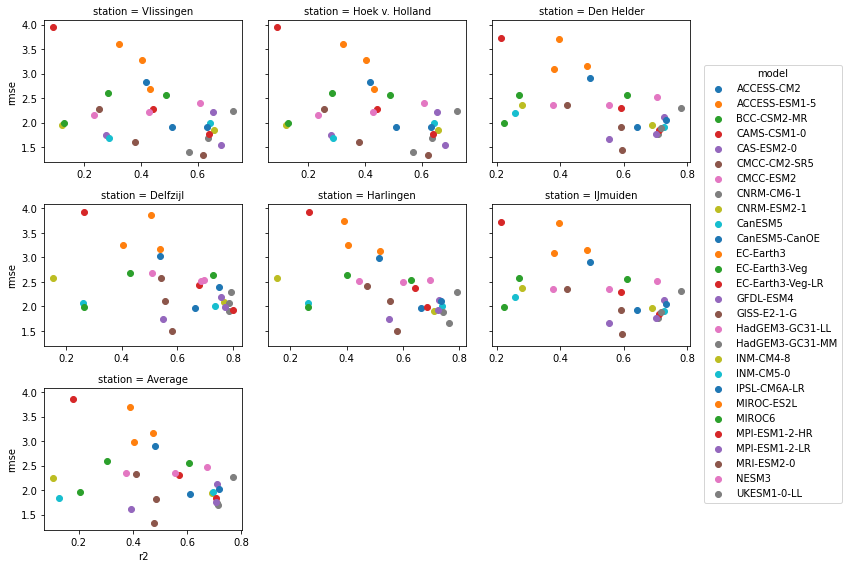

In [28]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

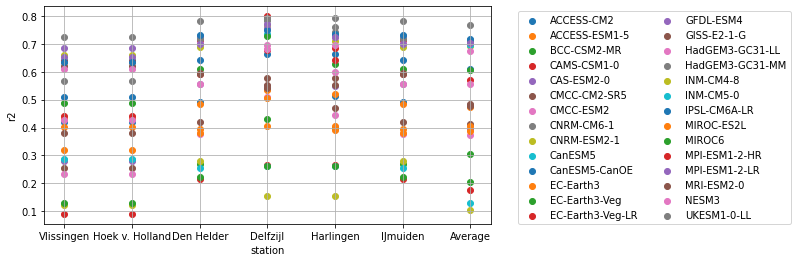

In [29]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type)

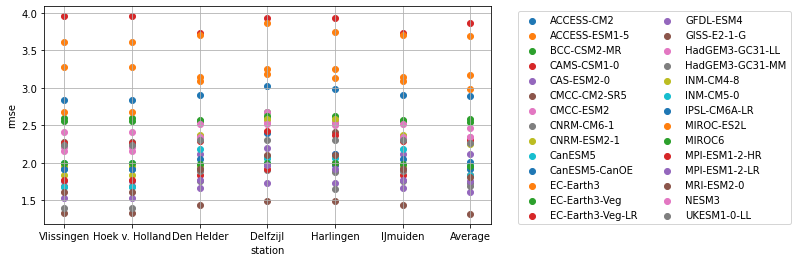

In [30]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

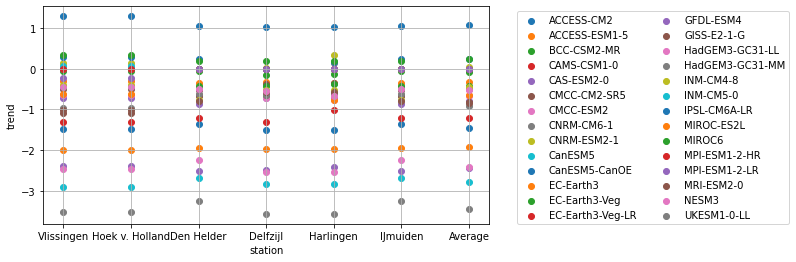

In [31]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type)

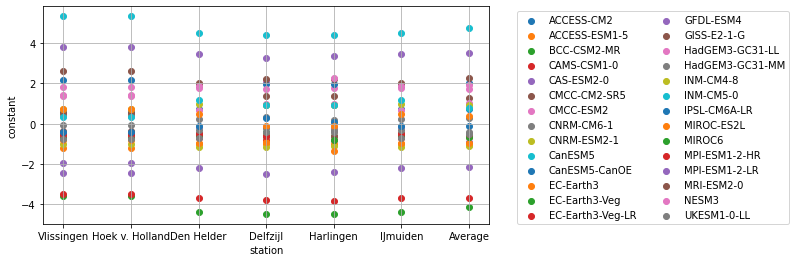

In [32]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

In [33]:
timeseries

<xarray.Dataset>
Dimensions:       (model: 28, station: 7, time: 165)
Coordinates:
  * time          (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * station       (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model         (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables: (12/23)
    channel_u2    (model, station, time) float64 0.0 0.0 ... -0.08415 -0.1703
    channel_v2    (model, station, time) float64 -0.0 -0.0 ... -0.6494 -0.4104
    south_u2      (model, station, time) float64 0.0 -0.0 ... -0.2526 -0.4574
    south_v2      (model, station, time) float64 -0.0 -0.0 0.0 ... 0.0 0.0 0.0
    midwest_u2    (model, station, time) float64 -0.0 0.0 0.0 ... -0.0 -0.0 -0.0
    midwest_v2    (model, station, time) float64 -0.0 -0.0 0.0 ... 0.0 0.0 0.0
    ...            ...
    midwest       (model, station, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mideast       (model, station, time) float64 0.3752 0.7775 ... 0.2574 0.241
    northwest     (model, station, time) float64 0.05664 2.363 ... -0.4136
    northeast     (model, station, time) float64 0.0375 0.1731 ... 0.0 0.0
    u2_total      (model, station, time) float64 0.09414 2.536 ... -0.6706
    v2_total      (model, station, time) float64 0.3752 0.7775 ... -0.5401

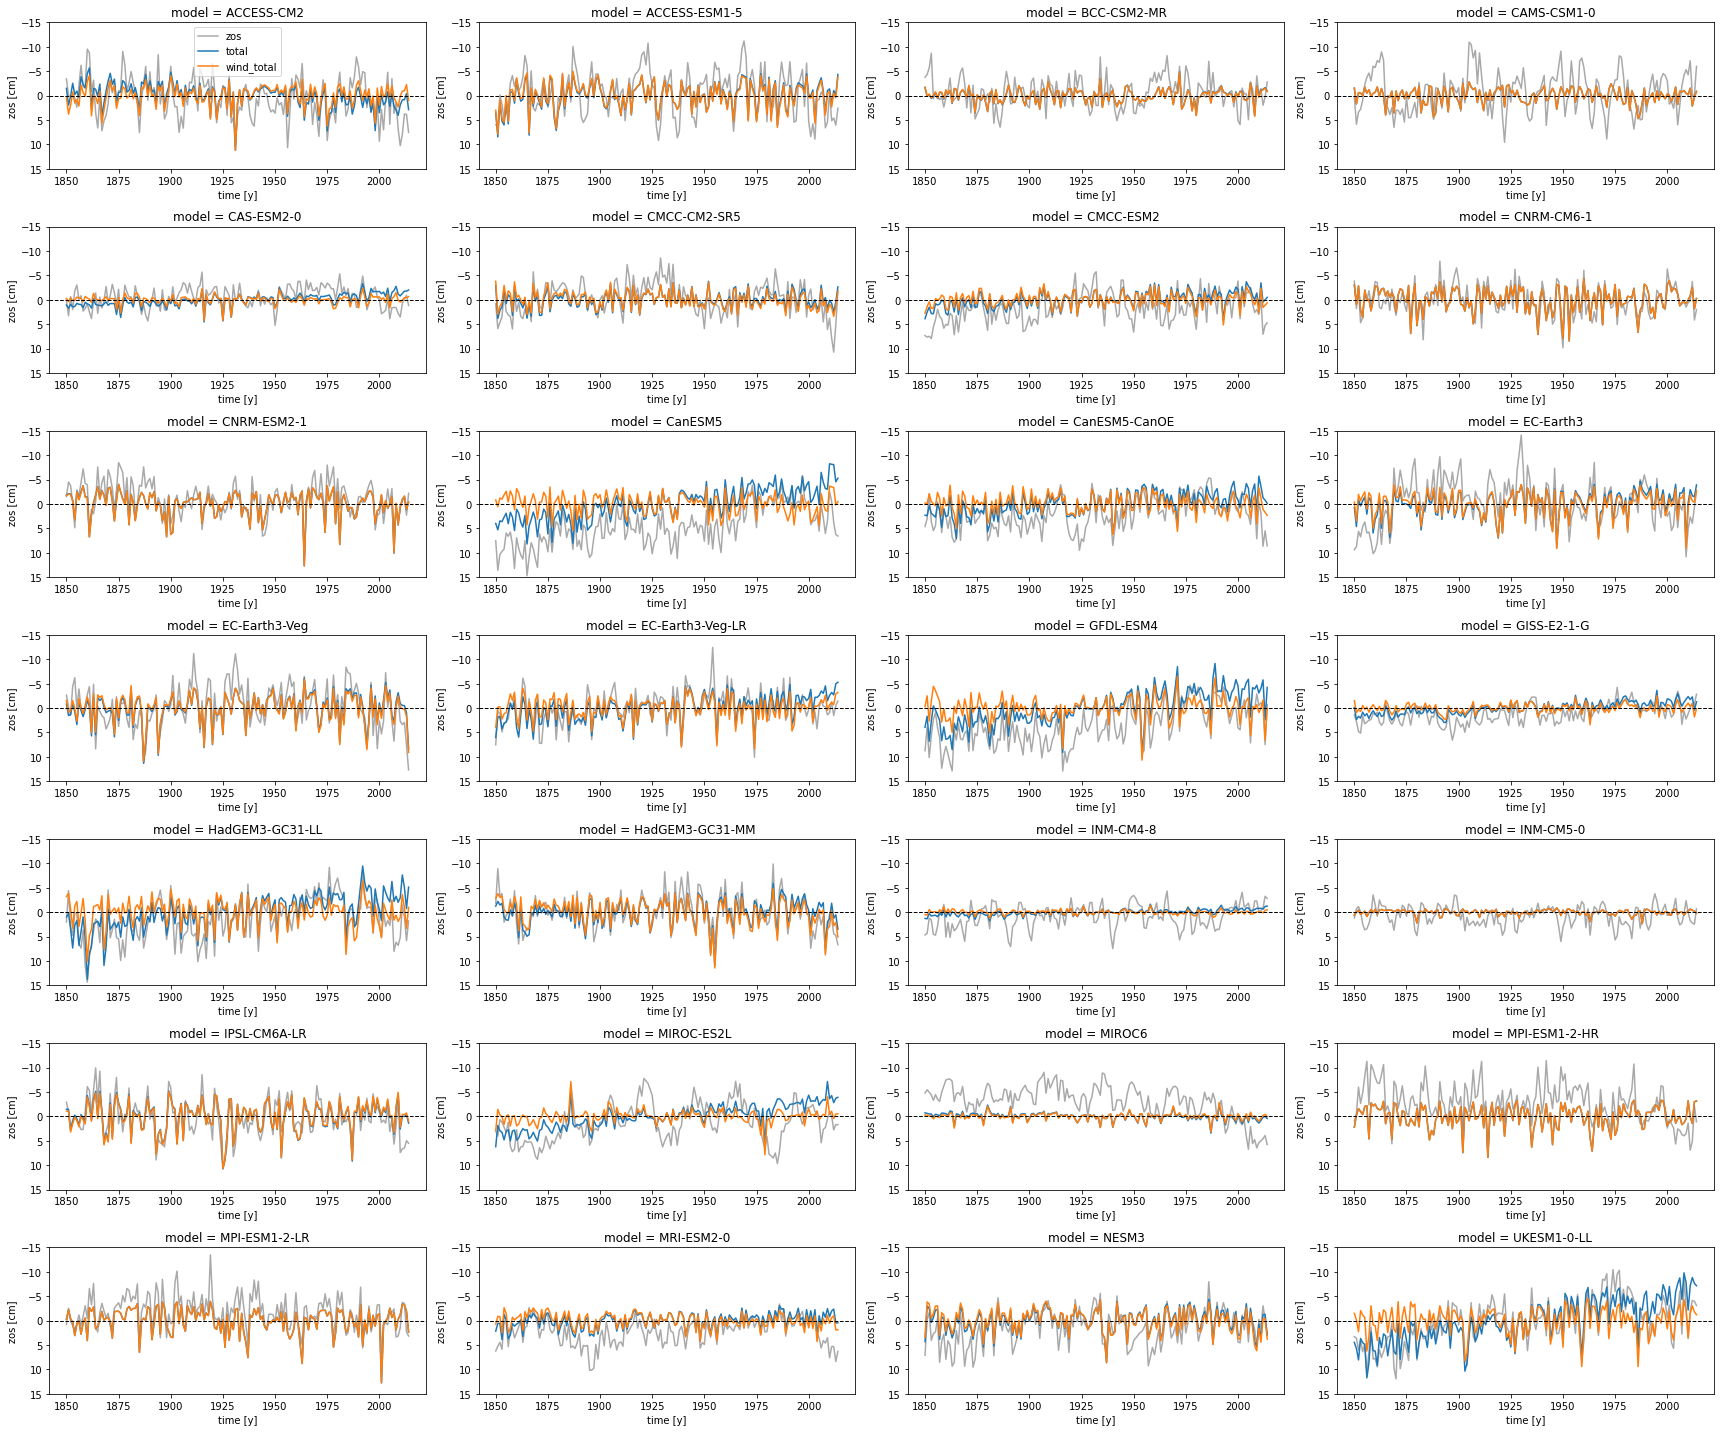

In [35]:
labels = ['total', 'wind_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

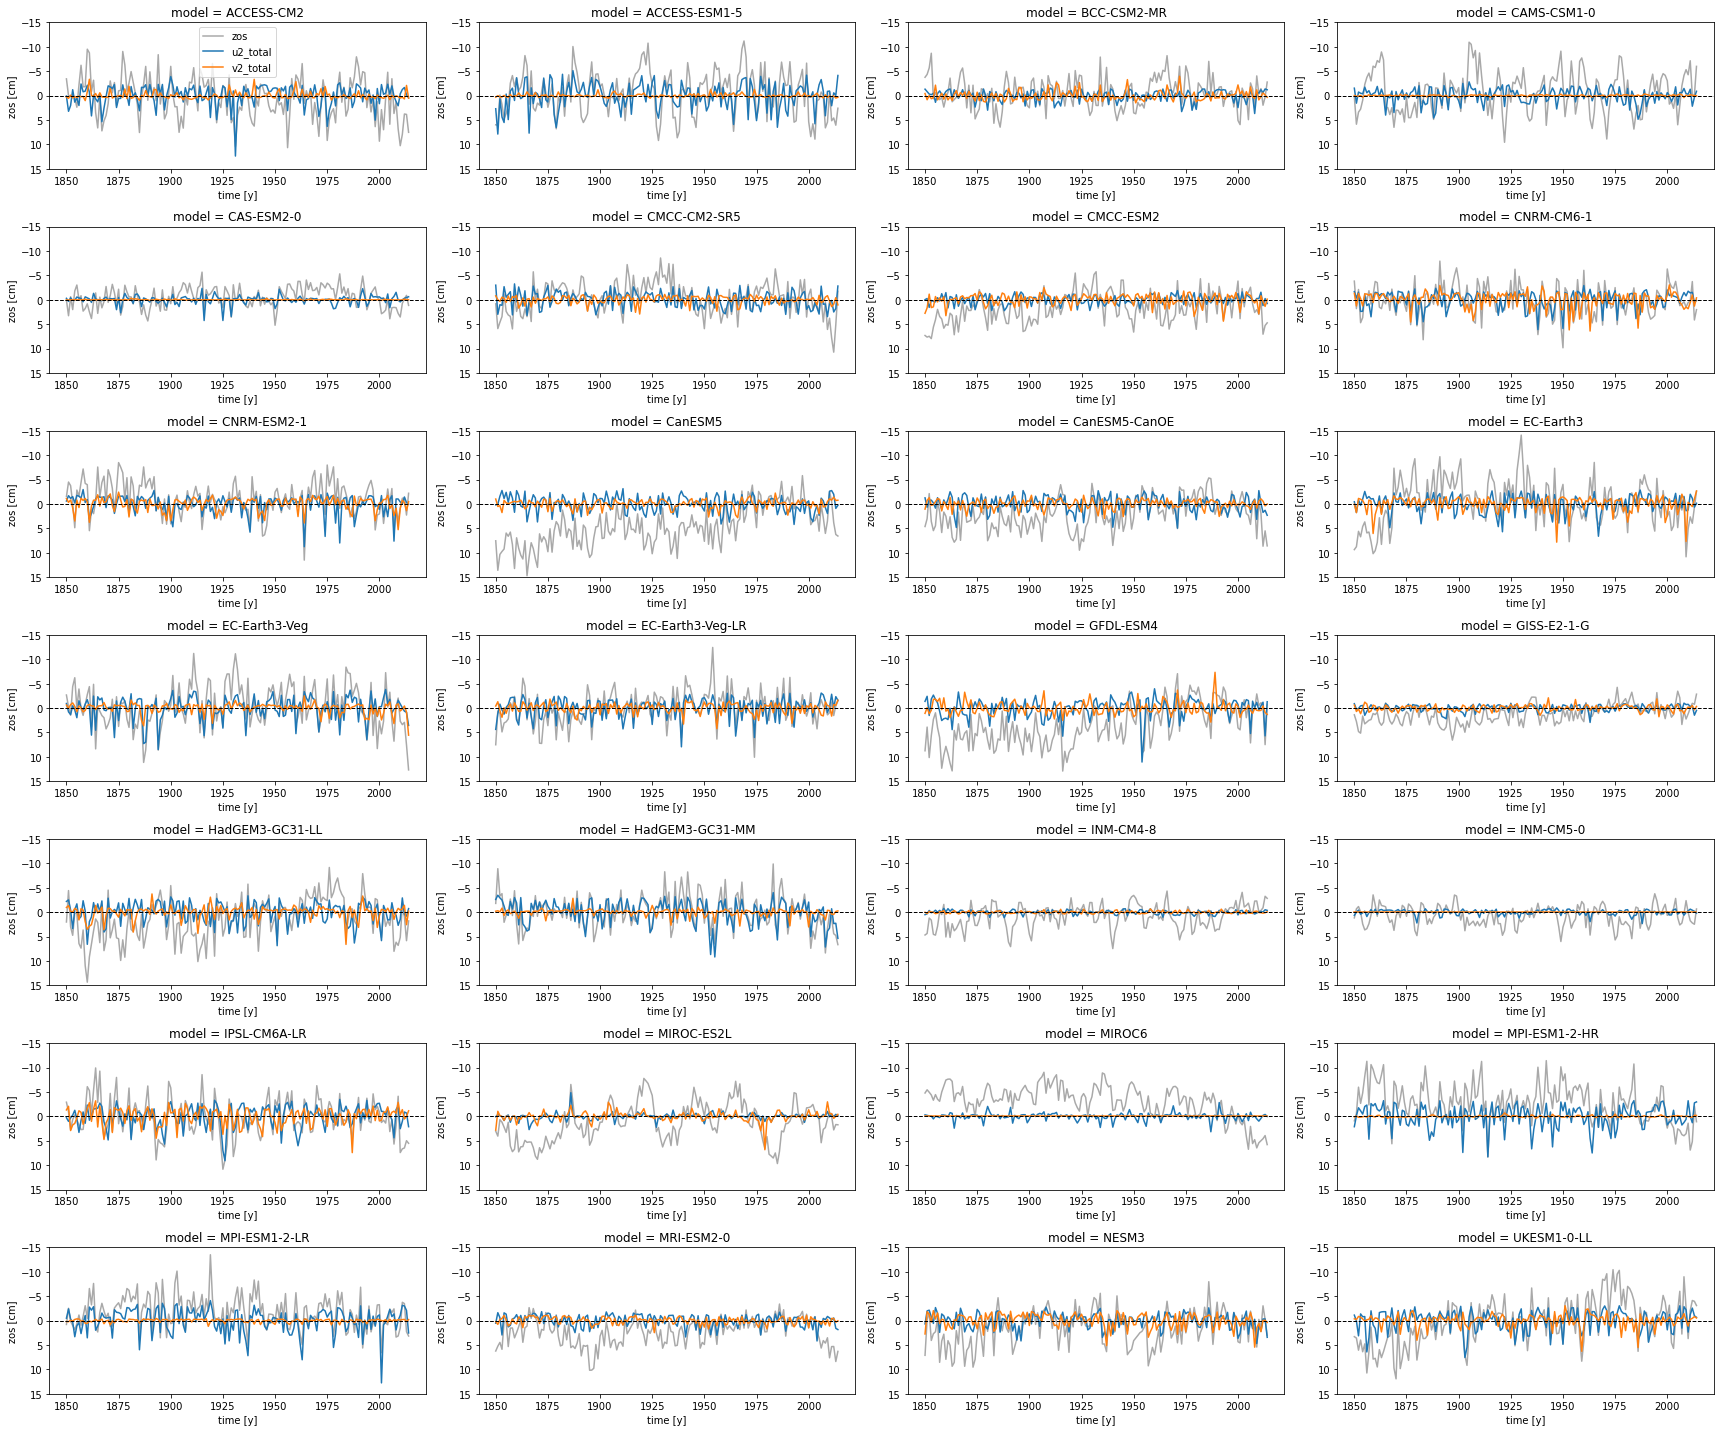

In [36]:
labels = ['u2_total', 'v2_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

#### Plot trends

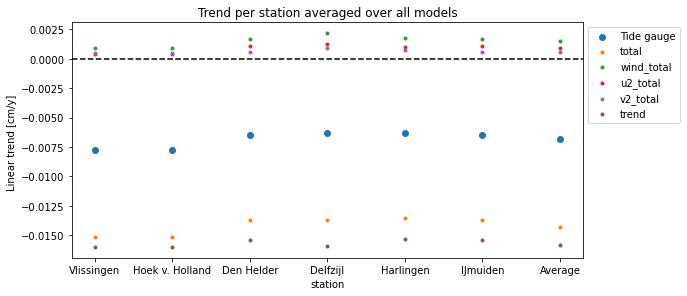

In [37]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'u2_total', 'v2_total', 'trend'], model, data_type, errorbar = False)